<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_2_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.284831,83.059367,46.850883,0.001381,187.196463,187.194791,0.001672
1,0.0,1.0,83.175138,91.277337,40.409937,0.000093,224.862505,224.863242,-0.000737
2,0.0,2.0,53.338960,50.114039,41.137780,-0.006571,154.584208,154.590405,-0.006197
3,0.0,3.0,74.348607,40.643634,68.971991,0.000839,193.965072,193.963239,0.001833
4,0.0,4.0,24.524915,51.224134,57.115746,-0.004991,142.859804,142.863243,-0.003439
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,56.271083,99.374941,75.191579,0.001233,240.838836,240.838538,0.000298
59996,999.0,56.0,54.609018,58.044535,82.896147,-0.001805,205.547895,205.549438,-0.001543
59997,999.0,57.0,77.338298,20.854226,49.834667,-0.006397,158.020795,158.026055,-0.005260
59998,999.0,58.0,26.375986,61.630472,84.149186,-0.000392,182.155252,182.154866,0.000386


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.284831,83.059367,46.850883,0.001381,187.196463,187.194791,0.001672
1,0.0,1.0,83.175138,91.277337,40.409937,0.000093,224.862505,224.863242,-0.000737
2,0.0,2.0,53.338960,50.114039,41.137780,-0.006571,154.584208,154.590405,-0.006197
3,0.0,3.0,74.348607,40.643634,68.971991,0.000839,193.965072,193.963239,0.001833
4,0.0,4.0,24.524915,51.224134,57.115746,-0.004991,142.859804,142.863243,-0.003439
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,56.271083,99.374941,75.191579,0.001233,240.838836,240.838538,0.000298
59996,999.0,56.0,54.609018,58.044535,82.896147,-0.001805,205.547895,205.549438,-0.001543
59997,999.0,57.0,77.338298,20.854226,49.834667,-0.006397,158.020795,158.026055,-0.005260
59998,999.0,58.0,26.375986,61.630472,84.149186,-0.000392,182.155252,182.154866,0.000386


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.284831  83.059367  46.850883  0.001381  187.196463   
      1.0    83.175138  91.277337  40.409937  0.000093  224.862505   
      2.0    53.338960  50.114039  41.137780 -0.006571  154.584208   
      3.0    74.348607  40.643634  68.971991  0.000839  193.965072   
      4.0    24.524915  51.224134  57.115746 -0.004991  142.859804   
...                ...        ...        ...       ...         ...   
999.0 55.0   56.271083  99.374941  75.191579  0.001233  240.838836   
      56.0   54.609018  58.044535  82.896147 -0.001805  205.547895   
      57.0   77.338298  20.854226  49.834667 -0.006397  158.020795   
      58.0   26.375986  61.630472  84.149186 -0.000392  182.155252   
      59.0   72.634466  71.786693  38.089791  0.002991  192.513941   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    187.194791  0.001672  
      1.0    224.863242 -0.000737  
      2.0    154.590405 -0.006197  
      3.0    193.963239  0.001833  
      4.0    142.863243 -0.003439  
...                 ...       ...  
999.0 55.0   240.838538  0.000298  
      56.0   205.549438 -0.001543  
      57.0   158.026055 -0.005260  
      58.0   182.154866  0.000386  
      59.0   192.511119  0.002822  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.284831  83.059367  46.850883  0.001381  187.196463   
      1.0    83.175138  91.277337  40.409937  0.000093  224.862505   
      2.0    53.338960  50.114039  41.137780 -0.006571  154.584208   
      3.0    74.348607  40.643634  68.971991  0.000839  193.965072   
      4.0    24.524915  51.224134  57.115746 -0.004991  142.859804   
...                ...        ...        ...       ...         ...   
999.0 55.0   56.271083  99.374941  75.191579  0.001233  240.838836   
      56.0   54.609018  58.044535  82.896147 -0.001805  205.547895   
      57.0   77.338298  20.854226  49.834667 -0.006397  158.020795   
      58.0   26.375986  61.630472  84.149186 -0.000392  182.155252   
      59.0   72.634466  71.786693  38.089791  0.002991  192.513941   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    187.194791  0.001672  
      1.0    224.863242 -0.000737  
      2.0    154.590405 -0.006197  
      3.0    193.963239  0.001833  
      4.0    142.863243 -0.003439  
...                 ...       ...  
999.0 55.0   240.838538  0.000298  
      56.0   205.549438 -0.001543  
      57.0   158.026055 -0.005260  
      58.0   182.154866  0.000386  
      59.0   192.511119  0.002822  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.284831,83.059367,46.850883,0.001381,187.196463,187.194791,0.001672
1,0.0,1.0,83.175138,91.277337,40.409937,0.000093,224.862505,224.863242,-0.000737
2,0.0,2.0,53.338960,50.114039,41.137780,-0.006571,154.584208,154.590405,-0.006197
3,0.0,3.0,74.348607,40.643634,68.971991,0.000839,193.965072,193.963239,0.001833
4,0.0,4.0,24.524915,51.224134,57.115746,-0.004991,142.859804,142.863243,-0.003439
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,56.271083,99.374941,75.191579,0.001233,240.838836,240.838538,0.000298
59996,999.0,56.0,54.609018,58.044535,82.896147,-0.001805,205.547895,205.549438,-0.001543
59997,999.0,57.0,77.338298,20.854226,49.834667,-0.006397,158.020795,158.026055,-0.005260
59998,999.0,58.0,26.375986,61.630472,84.149186,-0.000392,182.155252,182.154866,0.000386


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.284831  83.059367  46.850883  0.001381  187.196463   
      1.0    83.175138  91.277337  40.409937  0.000093  224.862505   
      2.0    53.338960  50.114039  41.137780 -0.006571  154.584208   
      3.0    74.348607  40.643634  68.971991  0.000839  193.965072   
      4.0    24.524915  51.224134  57.115746 -0.004991  142.859804   
...                ...        ...        ...       ...         ...   
999.0 55.0   56.271083  99.374941  75.191579  0.001233  240.838836   
      56.0   54.609018  58.044535  82.896147 -0.001805  205.547895   
      57.0   77.338298  20.854226  49.834667 -0.006397  158.020795   
      58.0   26.375986  61.630472  84.149186 -0.000392  182.155252   
      59.0   72.634466  71.786693  38.089791  0.002991  192.513941   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    187.194791  0.001672  
      1.0    224.863242 -0.000737  
      2.0    154.590405 -0.006197  
      3.0    193.963239  0.001833  
      4.0    142.863243 -0.003439  
...                 ...       ...  
999.0 55.0   240.838538  0.000298  
      56.0   205.549438 -0.001543  
      57.0   158.026055 -0.005260  
      58.0   182.154866  0.000386  
      59.0   192.511119  0.002822  

[60000 rows x 7 columns]

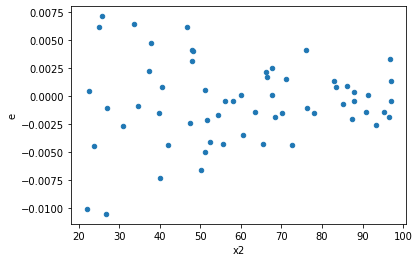

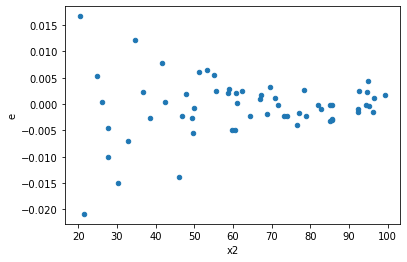

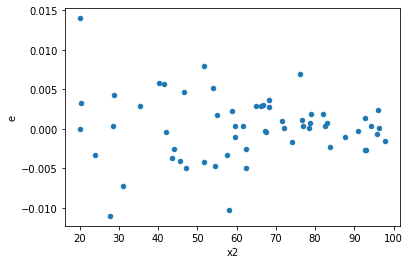

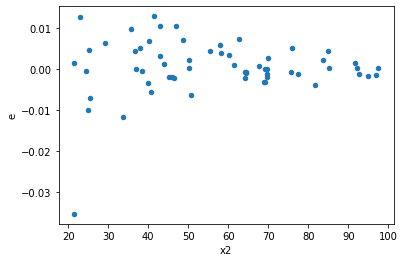

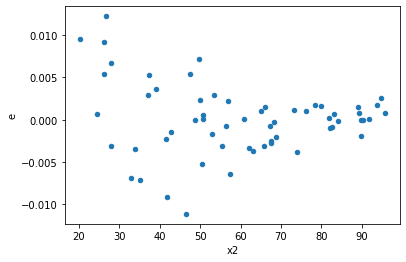

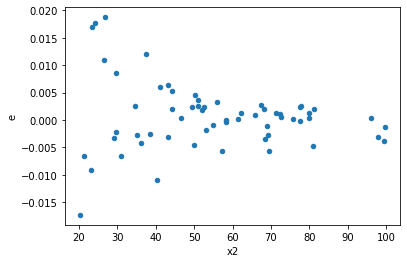

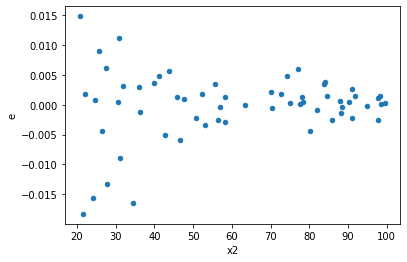

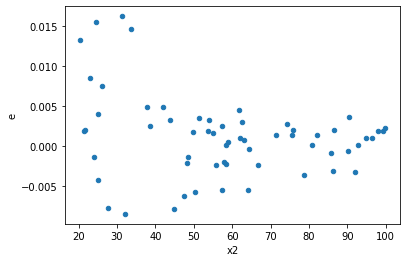

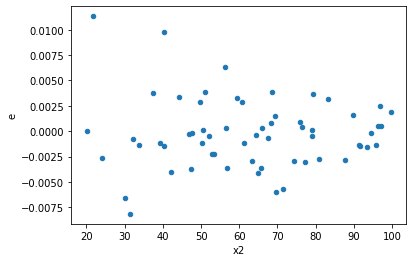

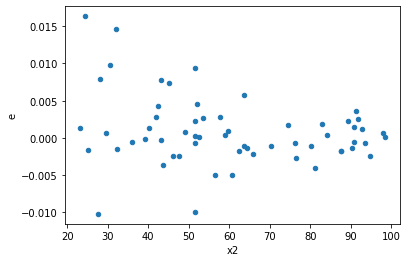

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,21.0,21.0,0.0003104263246009545,0.00035312775357415095,1.4782205933378785e-05,1.6815607313054807e-05,1.1375573705873305,0.7705040327573536,0.6147479836213232,0.3852520163786768,Reject005=1 : Homoscedasticity
19.0,21.0,21.0,0.00022293519749504154,0.00028911287534221696,1.0615961785478168e-05,1.3767279778200807e-05,1.2968471492647424,0.5567152976482694,0.7216423511758653,0.2783576488241347,Reject005=1 : Homoscedasticity
31.0,21.0,21.0,0.0004603673510314365,0.000490735397074565,2.1922254811020785e-05,2.3368352241645954e-05,1.0659648126112549,0.88500731266522,0.55749634366739,0.44250365633261,Reject005=1 : Homoscedasticity
59.0,21.0,21.0,0.00038536199283399777,0.00043012106801857455,1.8350571087333228e-05,2.048195561993212e-05,1.1161481308922376,0.8035659918720817,0.5982170040639592,0.40178299593604083,Reject005=1 : Homoscedasticity
82.0,21.0,21.0,0.00019065457238117843,0.00035490821519974965,9.078789161008497e-06,1.6900391199988077e-05,1.8615248025113005,0.16271158306742706,0.9186442084662865,0.08135579153371353,Reject005=1 : Homoscedasticity
93.0,21.0,21.0,0.00048527027908739663,0.0009579059698660479,2.3108108527971267e-05,4.561456999362133e-05,1.9739638118112115,0.12714500066362655,0.9364274996681867,0.06357250033181328,Reject005=1 : Homoscedasticity
109.0,21.0,21.0,0.0002651359576616932,0.0007155442979173072,1.2625521793413963e-05,3.407353799606225e-05,2.6987825575523168,0.027478707268177693,0.9862606463659112,0.013739353634088847,Reject005=0 : Heteroscedasticity
117.0,21.0,21.0,0.000720715837567297,0.0017004071264393314,3.4319801788918903e-05,8.097176792568244e-05,2.3593308732868734,0.05546509272308109,0.9722674536384595,0.027732546361540544,Reject005=1 : Homoscedasticity
134.0,21.0,21.0,0.00037543979726460875,0.0012394686279933091,1.7878085584028987e-05,5.9022315618729006e-05,3.3013778427962865,0.008523091090273605,0.9957384544548632,0.004261545545136802,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.00040187051046199865,0.00011496831281164001,1.9136690974380887e-05,5.474681562459048e-06,0.28608297901597723,0.005968804672081061,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,0.0007560212172412376,0.0003055775203259702,3.600101034482084e-05,1.4551310491712866e-05,0.40419172551934335,0.04359960471535401,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,0.0003104263246009545,0.00035312775357415095,1.4782205933378785e-05,1.6815607313054807e-05,1.1375573705873305,0.7705040327573536,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,0.0021466525649857225,0.00023814902303141412,0.00010222155071360583,1.1340429668162577e-05,0.11093971465894766,4.548801088227448e-06,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,0.00044442945837517076,6.992730513142411e-05,2.11633075416748e-05,3.3298716729249577e-06,0.15734174189775263,8.199723041466785e-05,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,0.0013380228325308803,0.0001736399386423546,6.371537297766097e-05,8.26856850677879e-06,0.12977352435302866,1.7144402572232152e-05,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,0.0010283374060630671,0.00019878527319733302,4.89684479077651e-05,9.46596539034919e-06,0.19330744172612707,0.0003989261850737981,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,0.00072694730804172,0.00024967793432329263,3.461653847817714e-05,1.1889425443966316e-05,0.3434608417436542,0.017971591833617986,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,0.0003460945184973746,0.00013343197768641353,1.648069135701784e-05,6.353903699353026e-06,0.38553623520456226,0.03403724368876758,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    741
Reject005=1 : Homoscedasticity      259
Name: Result_test, dtype: int64